In [82]:
# import required Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,RocCurveDisplay,auc,plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#importing the data
data = pd.read_csv("creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# check if dataset have any null entries
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# lets check if dataset is properly Balanced

cols = [c for c in data.columns if c not in ["Class"]]
X = data[cols]
Y = data["Class"]

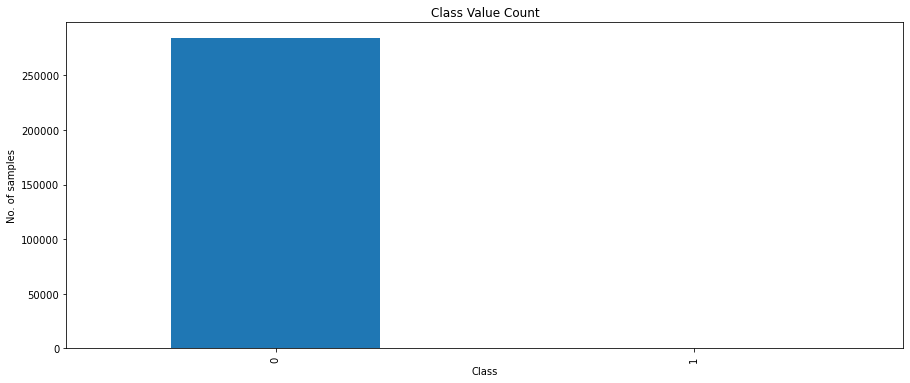

In [18]:
class_count = pd.value_counts(data["Class"])

plt.figure(figsize=(15,6))
class_count.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("No. of samples")
plt.title("Class Value Count")
plt.show()

In [21]:
# 1 ---> Under Sampling

# import require library

from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()

under_sampled_x, under_sampled_y = nearmiss.fit_sample(X,Y)

In [27]:
from collections import Counter

print("Number of samples before Under Sampling :{} ".format(Counter(Y)))
print("Number of samples after Under Sampling :{} ".format(Counter(under_sampled_y)))

Number of samples before Under Sampling :Counter({0: 284315, 1: 492}) 
Number of samples after Under Sampling :Counter({0: 492, 1: 492}) 


In [44]:
# 2 Over Sampling

from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()

over_sampled_x, over_sampled_y = over_sampler.fit_sample(X,Y)

In [45]:
print("Number of samples before Over Sampling :{} ".format(Counter(Y)))
print("Number of samples after Over Sampling :{} ".format(Counter(over_sampled_y)))

Number of samples before Over Sampling :Counter({0: 284315, 1: 492}) 
Number of samples after Over Sampling :Counter({0: 284315, 1: 284315}) 


In [46]:
# As we can see, now our dataset with Over and Under sampling looks good

# Now lets split out data into train and test set

In [47]:
# Splitting Under Sampled Data

us_x_train, us_x_test,us_y_train,us_y_test = train_test_split(under_sampled_x,under_sampled_y, test_size=0.3, random_state=42)

In [48]:
# Splitting Over Sampled Data
os_x_train, os_x_test,os_y_train,os_y_test = train_test_split(over_sampled_x,over_sampled_y, test_size=0.3, random_state=42)

In [49]:
# Now lets create a model

# create a regressor
us_Logistic_regressor = LogisticRegression()
os_Logistic_regressor = LogisticRegression()
# fit data to the regressor

#with under sampled data
us_Logistic_regressor.fit(us_x_train,us_y_train)
os_Logistic_regressor.fit(os_x_train,os_y_train)

LogisticRegression()

In [50]:
us_predictions = us_Logistic_regressor.predict(us_x_test)
os_predictions = os_Logistic_regressor.predict(os_x_test)

In [60]:
# Lets Analyze Under sampled data

print("Accuracy of under sampled data : {}".format(accuracy_score(us_y_test,us_predictions)))
print("\n\nCounfusion matrix :\n\n {}".format(confusion_matrix(us_y_test,us_predictions)))
print("\n\nPrecision Score : {}".format(precision_score(us_y_test,us_predictions)))
print("\n\nRecall Score : {}".format(recall_score(us_y_test,us_predictions)))

Accuracy of under sampled data : 0.956081081081081


Counfusion matrix :

 [[145   5]
 [  8 138]]


Precision Score : 0.965034965034965


Recall Score : 0.9452054794520548


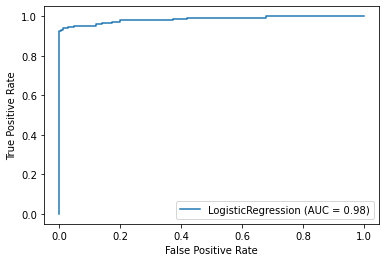

In [87]:
plot_roc_curve(us_Logistic_regressor,us_x_test,us_y_test)

In [88]:
# Lets Analyze Over Sampled Data

In [89]:
print("Accuracy of under sampled data : {}".format(accuracy_score(os_y_test,os_predictions)))
print("\n\nCounfusion matrix :\n\n {}".format(confusion_matrix(os_y_test,os_predictions)))
print("\n\nPrecision Score : {}".format(precision_score(os_y_test,os_predictions)))
print("\n\nRecall Score : {}".format(recall_score(os_y_test,os_predictions)))

Accuracy of under sampled data : 0.9374637286108718


Counfusion matrix :

 [[82069  3080]
 [ 7588 77852]]


Precision Score : 0.9619433598576583


Recall Score : 0.9111891385767791


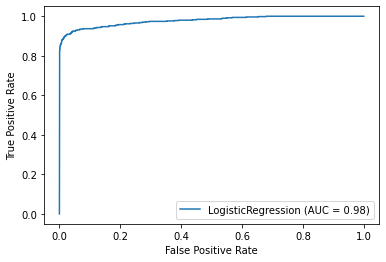

In [90]:
plot_roc_curve(os_Logistic_regressor,os_x_test,os_y_test)